In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#generate fake data to demo KDD
from faker import Faker
from datetime import datetime, time, date

In [2]:
np.random.seed(101)
fakegen = Faker()
columns_user = ['cc_num','name', 'age', 'location', 'address', 'phone_number', 'email', 'driving_license_details', 'income_details']
columns_beh = ['cc_num','credit_card_location', 'amount_spent', 'time_of_usage', 'date_of_usage', 'day_of_usage', 'quantity']
columns_social = ['email', 'sentiment_of_post', 'location_of_post']

In [3]:
cc_nums = []
names=[]
ages=[]
locations = []
addresses = []
phone_numbers = []
emails = []
driving_license_details = []
income_details=[]  
credit_card_locations = []
txn_amounts = []
time_of_usages = []
date_of_usages = []
day_of_usages = []
items_pur = [] 
quantities = []
posts = []
sentiments = []
locations_of_posts = []

In [4]:
names = [fakegen.name() for i in range (1000)]

In [5]:
cc_nums = [fakegen.credit_card_number(card_type=None) for _ in range(1000)]

In [6]:
ages = np.random.randint(18, 90, size=1000, dtype=np.int8).tolist()

In [7]:
locations = [fakegen.postcode() for _ in range(1000)]

In [8]:
addresses = [fakegen.street_address() + ", " + fakegen.city() for _ in range(1000)]

In [9]:
phone_numbers = [fakegen.phone_number() for _ in range(1000)]

In [10]:
emails = [fakegen.email() for _ in range(1000)]

In [11]:
driving_license_details = [fakegen.ean8() for _ in range(1000)]

In [12]:
income_details = [e*1000 for e in np.random.randint(0,500, size=1000)]

Credit card locations shall be close to user location. To fake it, add a random number between 0 to 20 to the user location. For 20 credit card locations, fake completely new postcodes, which supposedly are the fraud txn locations.

In [88]:
credit_card_locations = locations[:]
for k in range(50):
    i = np.random.randint(0,1000)
    if credit_card_locations[i][0] == '0':
        credit_card_locations[i] = '0'+ str(int(credit_card_locations[i])+np.random.randint(0,20))
    else:
        credit_card_locations[i] = str(int(credit_card_locations[i])+np.random.randint(0,20))
    if len(locations[i]) == 6:
        locations[i] = None
for m in range(20):
    n = np.random.randint(0,1000)
    postcode = fakegen.postcode()
    credit_card_locations[n] = postcode

In [15]:
txn_amounts = [round(abs(item)*250) for item in np.random.randn(1000)]

In [16]:
for i in range(1000):
    dt = fakegen.date_time_this_year(before_now=True, after_now=False, tzinfo=None)
    date_of_usages.append(dt.strftime('%Y%m%d'))
    time_of_usages.append(dt.strftime('%H%M%S'))
    day_of_usages.append(dt.isoweekday())

In [17]:
quantities = np.random.randint(1,10,size=1000).tolist()

In [18]:
sentiments = np.random.randint(1,5,size=1000).tolist()

In [19]:
locations_of_posts = [fakegen.uri() for i in range (1000)]

In [20]:
users = pd.DataFrame(np.column_stack([cc_nums, names, ages, locations, addresses, phone_numbers, emails, driving_license_details, income_details]),
                          columns=columns_user)

In [21]:
behaviors = pd.DataFrame(np.column_stack([cc_nums, credit_card_locations, txn_amounts, time_of_usages, date_of_usages, day_of_usages, quantities]),
                          columns=columns_beh)

In [22]:
socials = pd.DataFrame(np.column_stack([emails, sentiments, locations_of_posts]), columns=columns_social)

Introduce random NAN into data:

In [23]:
for i,j in zip(np.random.randint(0,1000, size=10),np.random.randint(2, len(users.columns),size=10)):
    users.iloc[i,j] = np.nan

In [24]:
for i,j in zip(np.random.randint(0,1000, size=10),np.random.randint(2, len(behaviors.columns),size=10)):
    behaviors.iloc[i,j] = np.nan

In [25]:
for i,j in zip(np.random.randint(0,1000, size=10),np.random.randint(2, len(socials.columns),size=10)):
    socials.iloc[i,j] = np.nan

In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
cc_num                     1000 non-null object
name                       1000 non-null object
age                        1000 non-null object
location                   997 non-null object
address                    998 non-null object
phone_number               999 non-null object
email                      999 non-null object
driving_license_details    1000 non-null object
income_details             997 non-null object
dtypes: object(9)
memory usage: 70.4+ KB


In [27]:
behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
cc_num                  1000 non-null object
credit_card_location    1000 non-null object
amount_spent            998 non-null object
time_of_usage           999 non-null object
date_of_usage           997 non-null object
day_of_usage            999 non-null object
quantity                997 non-null object
dtypes: object(7)
memory usage: 54.8+ KB


In [28]:
socials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
email                1000 non-null object
sentiment_of_post    1000 non-null object
location_of_post     990 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


In [29]:
users.to_csv('credit_card_users.csv',index=False)
behaviors.to_csv('credit_card_user_behaviors.csv',index=False)
socials.to_csv('credit_card_user_social_activities.csv',index=False)

From now on we use the generated data for the KDD process to select, preprocess, transform, mine and interpret the data

In [30]:
cc_users = pd.read_csv('credit_card_users.csv',dtype={'cc_num': object, 'location': object})

In [31]:
cc_beh = pd.read_csv('credit_card_user_behaviors.csv',parse_dates=['time_of_usage','date_of_usage'], 
                     dtype={'cc_num': object, 'credit_card_location': object})

In [32]:
cc_soc = pd.read_csv('credit_card_user_social_activities.csv')

Explore data properties

In [33]:
cc_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
cc_num                     1000 non-null object
name                       1000 non-null object
age                        1000 non-null int64
location                   997 non-null object
address                    998 non-null object
phone_number               999 non-null object
email                      999 non-null object
driving_license_details    1000 non-null int64
income_details             997 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [34]:
cc_users.nunique()

cc_num                     1000
name                        999
age                          72
location                    991
address                     998
phone_number                999
email                       998
driving_license_details    1000
income_details              440
dtype: int64

cc_num contains all unique values, meaning 1000 unique credit card numbers. This is to validate the data input. On the other hand, there are two duplicate emails. This might be a fraud alert because personal credit card under different person's name should not be registered using the same email. However, there are also many cases where multiple cards applied from the same email from different persons, for example a parent may apply credit card for self and kid.

In [35]:
cc_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
cc_num                  1000 non-null object
credit_card_location    1000 non-null object
amount_spent            998 non-null float64
time_of_usage           1000 non-null object
date_of_usage           997 non-null datetime64[ns]
day_of_usage            999 non-null float64
quantity                997 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 54.8+ KB


In [36]:
cc_beh.nunique()

cc_num                  1000
credit_card_location     992
amount_spent             436
time_of_usage            992
date_of_usage            267
day_of_usage               7
quantity                   9
dtype: int64

In [37]:
cc_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
email                1000 non-null object
sentiment_of_post    1000 non-null int64
location_of_post     990 non-null object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB


For data selection, it would be good to merge all three data together, using credit card number as the key for cc_users and cc_beh, whereas use email as the key for cc_users and cc_soc. Since there is one case of duplicated emails, doing merge will generate duplicate cartesian rows.

In [38]:
temp = pd.merge(cc_users,cc_beh,on='cc_num')

In [39]:
cc_data = pd.merge(temp, cc_soc, on='email')

In [40]:
cc_data

,cc_num,name,age,location,address,phone_number,email,driving_license_details,income_details,credit_card_location,amount_spent,time_of_usage,date_of_usage,day_of_usage,quantity,sentiment_of_post,location_of_post
0,6011794401211562,Brittney Velez,69,22891,"404 Sheila Walk Suite 109, North Jacqueline",+86(0)4280931909,alex71@yahoo.com,28818656,480000.0,22891,530.0,213056,2018-09-18,2.0,6.0,3,https://vazquez.info/tag/tags/faq.html
1,30537467092685,Pamela Lloyd,68,20210,"310 Arnold Cove Suite 068, Richardside",(568)207-3130,joshua24@hotmail.com,61437081,387000.0,20210,68.0,183550,2018-03-08,4.0,2.0,1,http://www.mcguire.com/search/
2,4415297851872898,Sean Anderson,22,54421,"5807 Little Keys, Annehaven",(927)678-8411,jmunoz@gmail.com,79404938,396000.0,54421,124.0,055651,2018-08-12,7.0,9.0,1,https://www.williams-huff.com/list/index.php
3,4563986079719333,Nathaniel Walsh,29,58209,"156 Stephanie Drives Suite 543, Marvinburgh",345.729.8381x555,parkersandra@baker-guerrero.org,42172116,382000.0,58209,107.0,111915,2018-07-14,6.0,6.0,1,https://www.newman.com/
4,4867206182732674,Joel Brown,88,31749,"62746 Buck Spur, Hernandezfurt",581.744.1293,fwilliams@lewis.com,54765764,327000.0,31749,167.0,111128,2018-03-17,6.0,7.0,2,http://www.fox.net/author/
5,4233395823410126,William Morris,31,08886,"19288 Kendra Burgs, Yorkstad",1-353-571-2919x915,foxrick@greer-peterson.com,90354441,9000.0,08886,167.0,030804,2018-08-21,2.0,9.0,3,https://porter-navarro.biz/explore/categories/...
6,4531723026968838061,Justin Scott,87,89745,"7081 Ortiz Path Apt. 681, Castillofort",02184966291,ellissteven@king-palmer.info,79344845,215000.0,89745,72.0,030301,2018-05-30,3.0,1.0,2,http://www.kennedy.biz/tags/main/main/
7,3574413633260331,Marcus Nelson,41,94902,"84710 Rodriguez Loop Suite 378, Mariashire",07964178678,brownjonathan@gmail.com,38197451,498000.0,94902,41.0,041443,2018-05-15,2.0,1.0,4,https://www.moore.com/main/main/
8,3513456573990775,Paul Velasquez,36,30756,"7172 Wall Prairie Suite 307, Lake Nancy",889-066-3448,ischmitt@rodriguez.com,92388260,223000.0,30756,159.0,080923,2018-08-23,4.0,6.0,4,http://wright-bridges.info/index.php
9,3501205991704464,Dr. Caitlin Robinson DVM,88,78498,"79153 Sandra Corners Suite 532, Kelseyberg",1-454-011-6556x2795,lindathompson@reid.com,54478411,167000.0,78498,456.0,123839,2018-07-24,2.0,4.0,4,http://ward.com/privacy/


In [41]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 17 columns):
cc_num                     1001 non-null object
name                       1001 non-null object
age                        1001 non-null int64
location                   998 non-null object
address                    999 non-null object
phone_number               1000 non-null object
email                      1001 non-null object
driving_license_details    1001 non-null int64
income_details             998 non-null float64
credit_card_location       1001 non-null object
amount_spent               999 non-null float64
time_of_usage              1001 non-null object
date_of_usage              998 non-null datetime64[ns]
day_of_usage               1000 non-null float64
quantity                   998 non-null float64
sentiment_of_post          1001 non-null int64
location_of_post           990 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(9)
memory usage: 14

Notice that indeed now there is one more duplicate entries, which makes the total rows to be 1001. I'll check the duplicates and possibly remove them later. 

The next step is to remove NAN. For non-numeric columns, no other way around but only drop NAN. For numeric columns, I'll use median to replace NAN.

In [42]:
cc_data_nonNum = cc_data.select_dtypes(exclude='number').dropna(how='any')

In [43]:
cc_data_nonNum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1000
Data columns (total 10 columns):
cc_num                  981 non-null object
name                    981 non-null object
location                981 non-null object
address                 981 non-null object
phone_number            981 non-null object
email                   981 non-null object
credit_card_location    981 non-null object
time_of_usage           981 non-null object
date_of_usage           981 non-null datetime64[ns]
location_of_post        981 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 84.3+ KB


All missing data have been removed

In [44]:
medians = cc_data.select_dtypes(include='number').apply(lambda x: x.median())

In [45]:
cc_data_Num = cc_data.select_dtypes(include='number').fillna(value=medians)

In [46]:
cc_data_Num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 7 columns):
age                        1001 non-null int64
driving_license_details    1001 non-null int64
income_details             1001 non-null float64
amount_spent               1001 non-null float64
day_of_usage               1001 non-null float64
quantity                   1001 non-null float64
sentiment_of_post          1001 non-null int64
dtypes: float64(4), int64(3)
memory usage: 62.6 KB


All missing data have been removed. Now I'll merge the two tables by a inner join to get rows without missing values.

In [47]:
cc_data = pd.merge(cc_data_nonNum, cc_data_Num, how='inner',left_index=True, right_index=True)

In [48]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1000
Data columns (total 17 columns):
cc_num                     981 non-null object
name                       981 non-null object
location                   981 non-null object
address                    981 non-null object
phone_number               981 non-null object
email                      981 non-null object
credit_card_location       981 non-null object
time_of_usage              981 non-null object
date_of_usage              981 non-null datetime64[ns]
location_of_post           981 non-null object
age                        981 non-null int64
driving_license_details    981 non-null int64
income_details             981 non-null float64
amount_spent               981 non-null float64
day_of_usage               981 non-null float64
quantity                   981 non-null float64
sentiment_of_post          981 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(9)
memory usage: 138.0+ KB


In [49]:
import seaborn as sns
%matplotlib inline

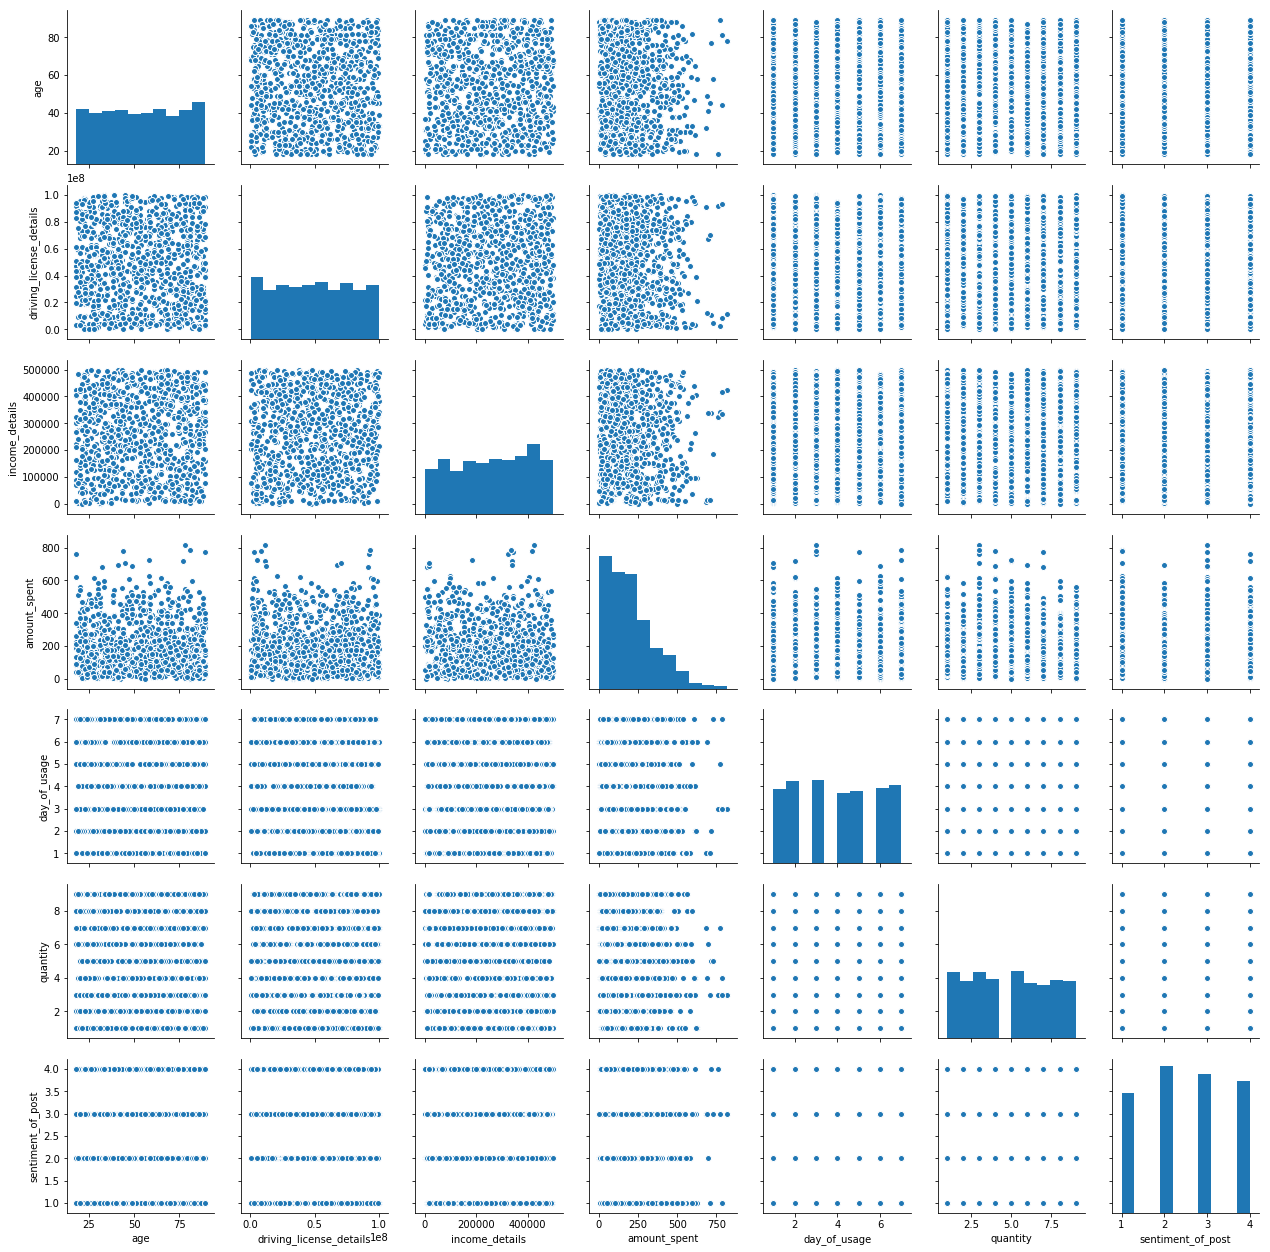

In [50]:
sns.pairplot(cc_data.select_dtypes(include='number'))
plt.show()

From the pairplot above it's clear that amount_spent has some "outliers", which may indicate credit card fraud events. 

Given the company has the following fraudulent criteria: 

A transaction would be considered to be fraudulent, until unless proven otherwise, under following conditions:

Credit Card transaction performed at odd hours of day (for instance mid-night 2 am)
Credit Card transaction performed with unusual large amounts (for instance, you tend to spend in the range of $25 - $300 per transaction, any transaction above $500 by your spending behavior considers to be fraudulent)
Customer behavior pattern 

First I can find transactions occurred at odd hours of day, particularly during weekdays. To do this, index needs to be changed to DatetimeIndex. I'll combine 'date_of_usage' column and 'time_of_usage' columns together to generate DatetimeIndex.

In [63]:
odd_hours = cc_data[(cc_data['time_of_usage'].astype(np.float64)>=20000)&(cc_data['time_of_usage'].astype(np.float64)<=50000)]

In [87]:
odd_hours.shape

(131, 17)

In [72]:
large_amt = cc_data[cc_data['amount_spent']>=500]

In [73]:
large_amt.shape

(50, 17)

In [56]:
temp = []
for i in cc_data.index:
# if the first two digits of zipcode are not the same, it suggests the card is used elsewhere far away from registered user zipcode
    if cc_data.loc[i]['location'][:2]!=cc_data.loc[i]['credit_card_location'][:2]:
        temp.append(cc_data.loc[i])

In [78]:
odd_loc = pd.DataFrame(temp, columns=cc_data.columns)

In [81]:
odd_loc.shape

(19, 17)

In [82]:
pd.merge(pd.merge(odd_hours,large_amt,on='cc_num'),odd_loc,on='cc_num')

,cc_num,name_x,location_x,address_x,phone_number_x,email_x,credit_card_location_x,time_of_usage_x,date_of_usage_x,location_of_post_x,...,time_of_usage,date_of_usage,location_of_post,age,driving_license_details,income_details,amount_spent,day_of_usage,quantity,sentiment_of_post


No transaction belongs to the intersect of all three criteria. No fraud detected if to meet all three criteria.

In [84]:
pd.merge(odd_hours,large_amt)

,cc_num,name,location,address,phone_number,email,credit_card_location,time_of_usage,date_of_usage,location_of_post,age,driving_license_details,income_details,amount_spent,day_of_usage,quantity,sentiment_of_post
0,3524747225731295,Mitchell Henry,13674,"1011 Chelsea Isle, Andrewsport",03374239234,bmartinez@anderson.org,13674,045637,2018-03-17,https://www.johnson-green.com/home.asp,58,21060793,97000.0,626.0,6.0,1.0,1
1,5315414357542556,William Johnson,76299,"771 Obrien Spring Suite 004, West Erinchester",00018636335,tami78@howard-hill.biz,76299,020853,2018-09-20,https://www.ward.com/faq/,49,54527553,442000.0,514.0,4.0,6.0,1
2,30241812280349,Charles Martin,77932,"24860 Mark Hollow, West Paul",(413)082-0896,ajames@wade-griffin.com,77932,035507,2018-06-25,https://www.harrington.com/category/app/wp-con...,68,1694833,206000.0,583.0,1.0,3.0,2
3,676260849655,Laurie Wall,54542,"650 Davis Extension, New Michaelstad",(444)088-0980x6588,williamsdawn@norton-hudson.info,54549,043414,2018-05-06,http://mccullough-castaneda.net/wp-content/cat...,58,4958840,184000.0,727.0,7.0,5.0,3
4,6521039109996681,Daniel Nichols,69756,"44924 Sanchez Oval, Jamesstad",1-785-519-1407,flane@hall-hernandez.com,69756,021059,2018-04-08,https://morton.com/faq.html,81,93308007,335000.0,784.0,7.0,3.0,1
5,2222792459741716,Andrea Fitzgerald,84679,"148 Griffin Ferry, Michelleburgh",(621)300-5237,smithkelly@yahoo.com,84679,020934,2018-07-25,https://www.stone-watkins.biz/category/wp-cont...,78,80442998,9000.0,548.0,3.0,1.0,2
6,5403055060572449,Juan Harris,43565,"59164 Raymond Ranch, West Andrewmouth",360-704-2914x3068,tmitchell@austin.com,43565,020747,2018-03-27,https://www.thomas.com/,52,68820428,107000.0,506.0,2.0,8.0,4
7,180073044973831,Matthew Smith,55610,"49398 Rebecca Hills Suite 396, Josephchester",01711756844,oconnoremily@yahoo.com,55610,020131,2018-02-14,http://johnson.com/about.jsp,81,74462810,15000.0,504.0,3.0,9.0,4
8,4555699573531902,Jacob Chase,95789,"209 Joseph Expressway, New Jenniferfort",071-108-0327x941,longgary@yahoo.com,95789,044606,2018-08-06,http://jones-barber.com/index/,45,70203912,16000.0,706.0,1.0,3.0,1


8 transactions belong to the intersect of odd hour and large amount spent. These could be fraududlent if to meet the two criteria of odd hours and large amount spent.

In [85]:
pd.merge(odd_hours,odd_loc)

,cc_num,name,location,address,phone_number,email,credit_card_location,time_of_usage,date_of_usage,location_of_post,age,driving_license_details,income_details,amount_spent,day_of_usage,quantity,sentiment_of_post
0,3538498342168698,Paula Williams,95147,"3621 Fisher Lane, Danielberg",1-367-459-2252x382,imorales@alvarez.info,92253,043406,2018-08-29,https://carpenter-williams.com/homepage.php,28,55043052,431000.0,68.0,3.0,4.0,4


1 transaction belongs to the intersect of odd hour and odd location. It could be fraududlent if to meet the two criteria of odd hours and odd credit card transactionlocations.

In [86]:
pd.merge(odd_loc,large_amt)

,cc_num,name,location,address,phone_number,email,credit_card_location,time_of_usage,date_of_usage,location_of_post,age,driving_license_details,income_details,amount_spent,day_of_usage,quantity,sentiment_of_post


No transaction belongs to the intersect of odd location and large amount spent

Summary: In this report I presented how to select, preprocess, transform, mine and interpret data following KDD processes to detect potential credit card fraud using a fake dataset. By doing so I got deep understanding of the data structure and nature of the analysis. The analysis could be more convincing if real data is used.